# **Machine Learning Model Performance Evaluation**

## **Objective**
The goal of this project was to evaluate multiple machine learning models on a noisy 3D sinusoidal dataset to determine which model best captures the underlying data patterns. By comparing **Polynomial Regression, Random Forest, XGBoost, and a Neural Network**, we assessed their predictive accuracy and generalization ability.

## **Model Performance**
We measured model performance using **Mean Squared Error (MSE)** and **R-squared (R²)** to quantify prediction accuracy.

### **Regression Model Results**
- **Polynomial Regression**:  
  - **MSE**: 3.8608  
  - **R²**: 0.6863  
  - *Struggled to fit the complex nonlinear pattern, leading to high error and low R².*

- **Random Forest**:  
  - **MSE**: 0.2202  
  - **R²**: 0.9821  
  - *Achieved the best performance with a strong fit to the data and minimal error.*

- **XGBoost**:  
  - **MSE**: 0.2640  
  - **R²**: 0.9785  
  - *Performed similarly to Random Forest, demonstrating strong predictive capability.*

- **Neural Network**:  
  - **MSE**: 0.5485  
  - **R²**: 0.9554  
  - *Captured patterns effectively but underperformed compared to ensemble models.*

## **Key Takeaways**
- **Tree-based models (Random Forest, XGBoost) outperformed other methods**, achieving the lowest MSE and highest R², making them the most effective for this dataset.
- **Polynomial Regression failed to generalize**, highlighting its limitations for highly nonlinear relationships.
- **Neural Networks showed promise but require further tuning** to reach optimal performance.

## **Conclusion**
This study demonstrates that **ensemble learning methods like Random Forest and XGBoost provide the best balance of accuracy and generalization** for noisy, nonlinear datasets. While neural networks remain a viable option, they may require additional optimization to match tree-based model performance. These findings can help inform model selection strategies for complex regression tasks.


In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# Load Data
data = pd.read_csv("3DSinusoidalANN.csv")
X = data[['x', 'z']].values
y = data['y'].values

In [12]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Polynomial Regression
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_preds = poly_model.predict(X_test_poly)

In [15]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [16]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [17]:
# Neural Network Model
nn_model = Sequential([
    Dense(units=64, activation='relu', input_shape=(2,)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train_scaled, y_train, epochs=100, verbose=0)
nn_preds = nn_model.predict(X_test_scaled).flatten()


C:\Users\jaycz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [18]:
# Evaluate Models
models = {"Polynomial Regression": poly_preds, "Random Forest": rf_preds, "XGBoost": xgb_preds, "Neural Network": nn_preds}
for name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name}: MSE = {mse:.4f}, R-squared = {r2:.4f}")

Polynomial Regression: MSE = 3.8608, R-squared = 0.6863
Random Forest: MSE = 0.2202, R-squared = 0.9821
XGBoost: MSE = 0.2640, R-squared = 0.9785
Neural Network: MSE = 0.5597, R-squared = 0.9545


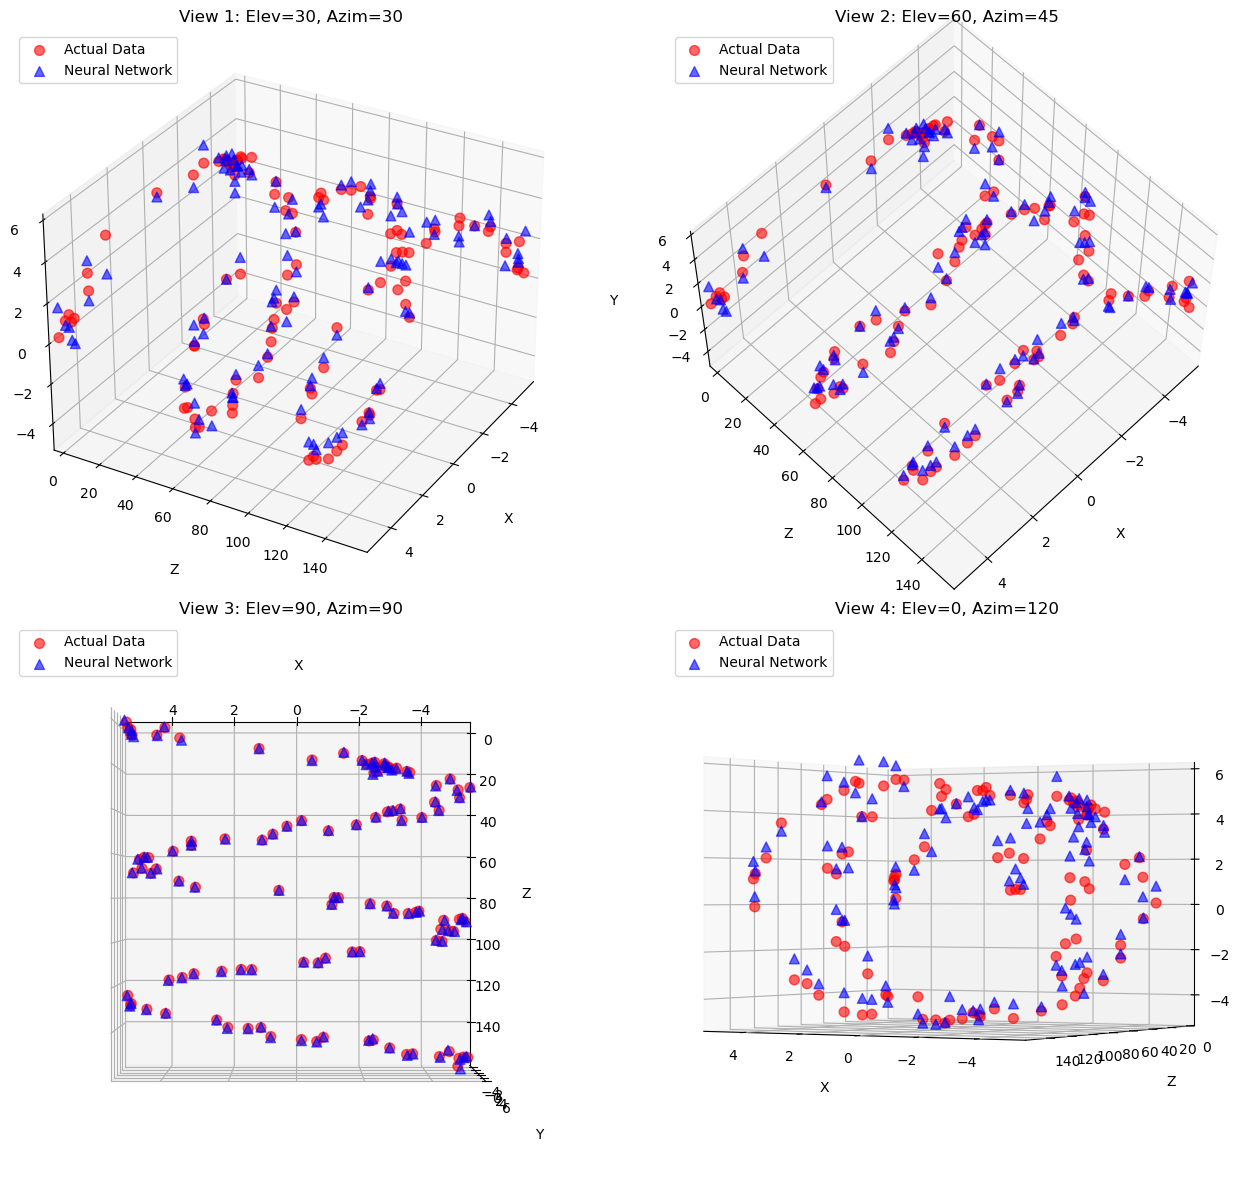

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create the figure and a 2x2 grid of subplots
fig = plt.figure(figsize=(14, 12))

# Define a list of view angles for different perspectives
view_angles = [(30, 30), (60, 45), (90, 90), (0, 120)]

# Get the min and max values for each axis to properly scale the limits
x_min, x_max = X_test[:, 0].min(), X_test[:, 0].max()
z_min, z_max = X_test[:, 1].min(), X_test[:, 1].max()
y_min, y_max = min(y_test.min(), nn_preds.min()), max(y_test.max(), nn_preds.max())

# Loop over the angles and create a subplot for each
for i, (elev, azim) in enumerate(view_angles, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    # Plot the actual data in red
    ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='red', marker='o', s=50, alpha=0.6, label='Actual Data')

    # Plot the neural network predictions in blue
    ax.scatter(X_test[:, 0], X_test[:, 1], nn_preds, color='blue', marker='^', s=50, alpha=0.6, label='Neural Network')

    # Set axis labels
    ax.set_xlabel('X', fontsize=10, labelpad=15)
    ax.set_ylabel('Z', fontsize=10, labelpad=15)
    ax.set_zlabel('Y', fontsize=10, labelpad=15)

    # Set axis limits based on the data range
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([z_min, z_max])
    ax.set_zlim([y_min, y_max])

    # Set the title for each subplot
    ax.set_title(f'View {i}: Elev={elev}, Azim={azim}', fontsize=12)

    # Adjust the view angle
    ax.view_init(elev=elev, azim=azim)

    # Add a legend
    ax.legend(loc='upper left', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
